# CONTENT

# Setting up the working directory

In [1]:
import os as os

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\project")

In [3]:
#Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller


# Loading the Time Series dataset

In [5]:
pesticide=pd.read_excel("Sales_Forecast_Data.xlsx",parse_dates = True,squeeze= True)

In [6]:
pesticide.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


In [7]:
#CHECKING DATA TYPES
pesticide.dtypes

FIN_YEAR     object
MONTH        object
STATE        object
FG           object
DISTRICT     object
COMPANY      object
VALUE       float64
dtype: object

In [8]:
pesticide.shape

(230152, 7)

In [9]:
pesticide.describe(include="object")

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY
count,230152,230152,230152,230152,230152,230152
unique,4,12,5,4,142,47
top,2016-2017,Nov,Uttar Pradesh,Herbicides,Karnal,ABC Manufacturing
freq,76280,23864,122644,57538,4308,28640


In [10]:
pesticide.describe(include="float64")

,VALUE
count,230152.000000
mean,704.973592
std,2261.623760
min,0.000000
25%,0.000000
50%,0.000000
75%,269.865000
max,69828.750000


In [11]:
pesticide.describe(include="all")

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
count,230152,230152,230152,230152,230152,230152,230152.000000
unique,4,12,5,4,142,47,NaN
top,2016-2017,Nov,Uttar Pradesh,Herbicides,Karnal,ABC Manufacturing,NaN
freq,76280,23864,122644,57538,4308,28640,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,704.973592
std,NaN,NaN,NaN,NaN,NaN,NaN,2261.623760
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,269.865000


# DATA PREPROCESSING

# Creating the dataframe for ABC Manufacturing

In [12]:
#we need to do evaluation for ABC company therefore setting the data accordingly
pesticide1=pesticide[pesticide["COMPANY"]=="ABC Manufacturing"].iloc[:]

In [13]:
pesticide1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


In [14]:
#checking the dimension of new dataset
pesticide1.shape

(28640, 7)

In [15]:
#information about dataset
pesticide1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28640 entries, 49 to 230147
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIN_YEAR  28640 non-null  object 
 1   MONTH     28640 non-null  object 
 2   STATE     28640 non-null  object 
 3   FG        28640 non-null  object 
 4   DISTRICT  28640 non-null  object 
 5   COMPANY   28640 non-null  object 
 6   VALUE     28640 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


In [16]:
#checking min and max year
pesticide1['FIN_YEAR'].min(), pesticide1['FIN_YEAR'].max()

('2014-2015', '2017-2018')

In [17]:
from datetime import datetime

In [18]:
# creating new variable on the basis of FIN_YEAR
pesticide1['YEAR']=''
pesticide1.YEAR=pesticide1['FIN_YEAR'].str[0:4]

In [19]:
pesticide1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,YEAR
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014


In [20]:
# create new varible on the basis of month and year
pesticide1['MONTH_YEAR']=''

pesticide1.MONTH_YEAR=pesticide1['MONTH']+pesticide1['YEAR']

In [21]:
pesticide1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,YEAR,MONTH_YEAR
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,Dec2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,Dec2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,Dec2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,Dec2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,Dec2014


In [22]:
# converting Month_year into datetime format 
pesticide1['MONTH_YEAR']=pd.to_datetime(pesticide1['MONTH_YEAR'])

In [23]:
pesticide1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,YEAR,MONTH_YEAR
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,2014-12-01
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,2014-12-01
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,2014-12-01
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,2014-12-01
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,2014-12-01


In [24]:
pesticide1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28640 entries, 49 to 230147
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FIN_YEAR    28640 non-null  object        
 1   MONTH       28640 non-null  object        
 2   STATE       28640 non-null  object        
 3   FG          28640 non-null  object        
 4   DISTRICT    28640 non-null  object        
 5   COMPANY     28640 non-null  object        
 6   VALUE       28640 non-null  float64       
 7   YEAR        28640 non-null  object        
 8   MONTH_YEAR  28640 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 2.2+ MB


# DATA VISULAISATION

In [25]:
#CHECKING IF ANY MISSING VALUES PRESENT
import missingno as msno

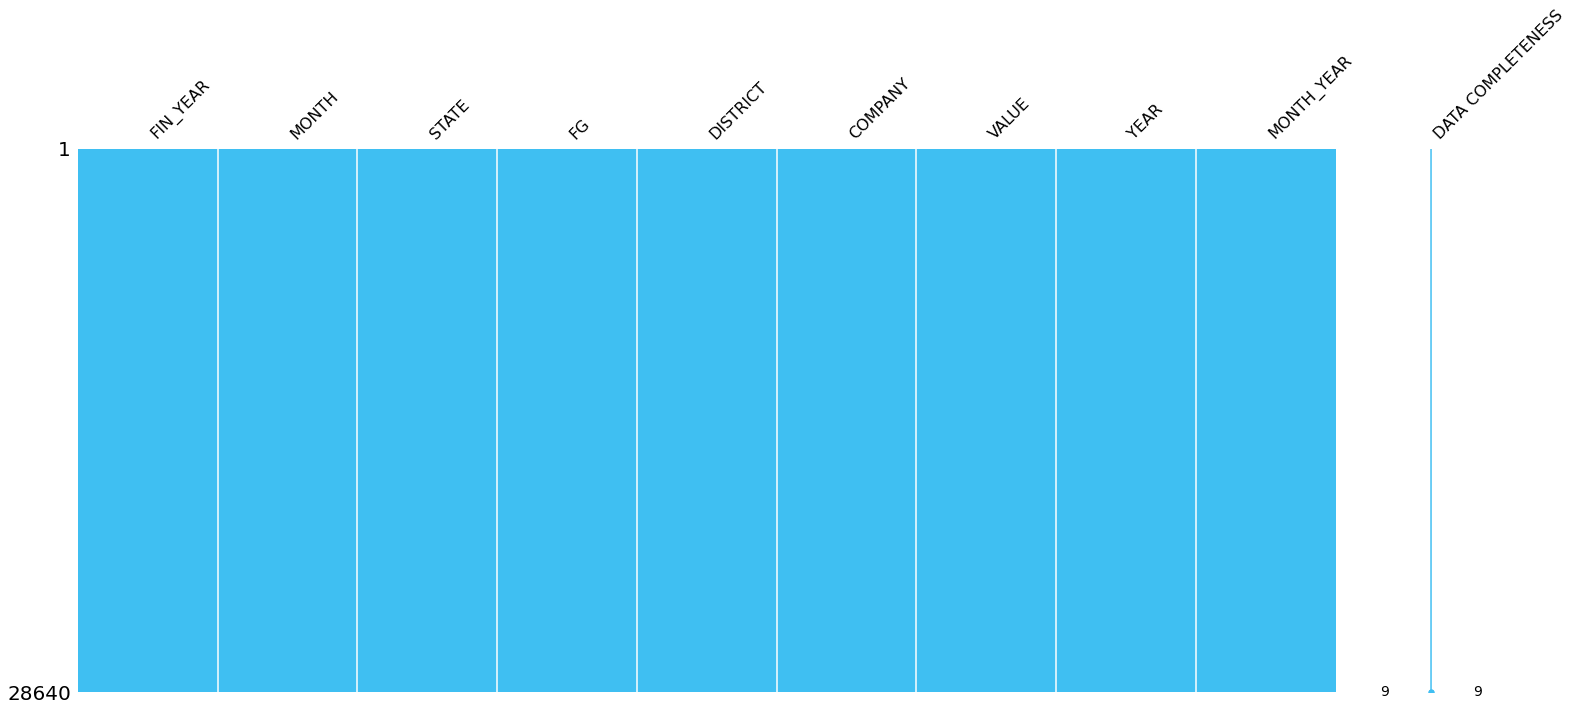

In [26]:
msno.matrix(pesticide1, labels=True, color=(0.25,0.75,0.95));plt.show()

In [27]:
#which state has the maximum and minimum consumption of pesticides?

pesticide1['STATE'].value_counts(dropna= False)

Uttar Pradesh       13024
Haryana              6028
Himachal Pradesh     3880
Punjab               3668
Uttarakhand          2040
Name: STATE, dtype: int64

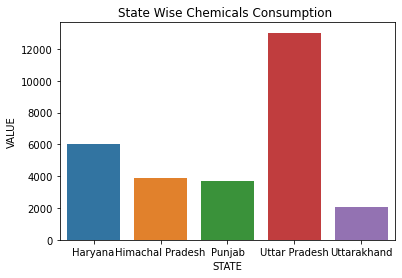

In [28]:
sns.countplot(x='STATE', data= pesticide1)
plt.ylabel("VALUE")
plt.xlabel("STATE")
plt.title("State Wise Chemicals Consumption ")
plt.show;

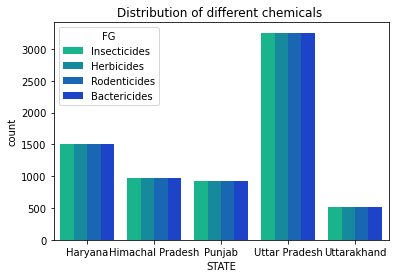

In [29]:
#which pesticide is sold the most statewise?

sns.countplot(x='STATE', hue='FG', data = pesticide1, palette='winter_r')
plt.ylabel("count")
plt.xlabel("STATE")
plt.title("Distribution of different chemicals ")
plt.show;

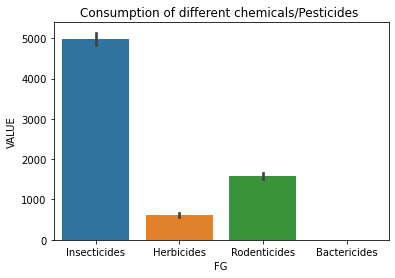

In [30]:
#which pesticide has highest and lowest Consumption overall?

sns.barplot(x='FG',y='VALUE',data= pesticide1)
plt.ylabel("VALUE")
plt.xlabel("FG")
plt.title("Consumption of different chemicals/Pesticides ")
plt.show;


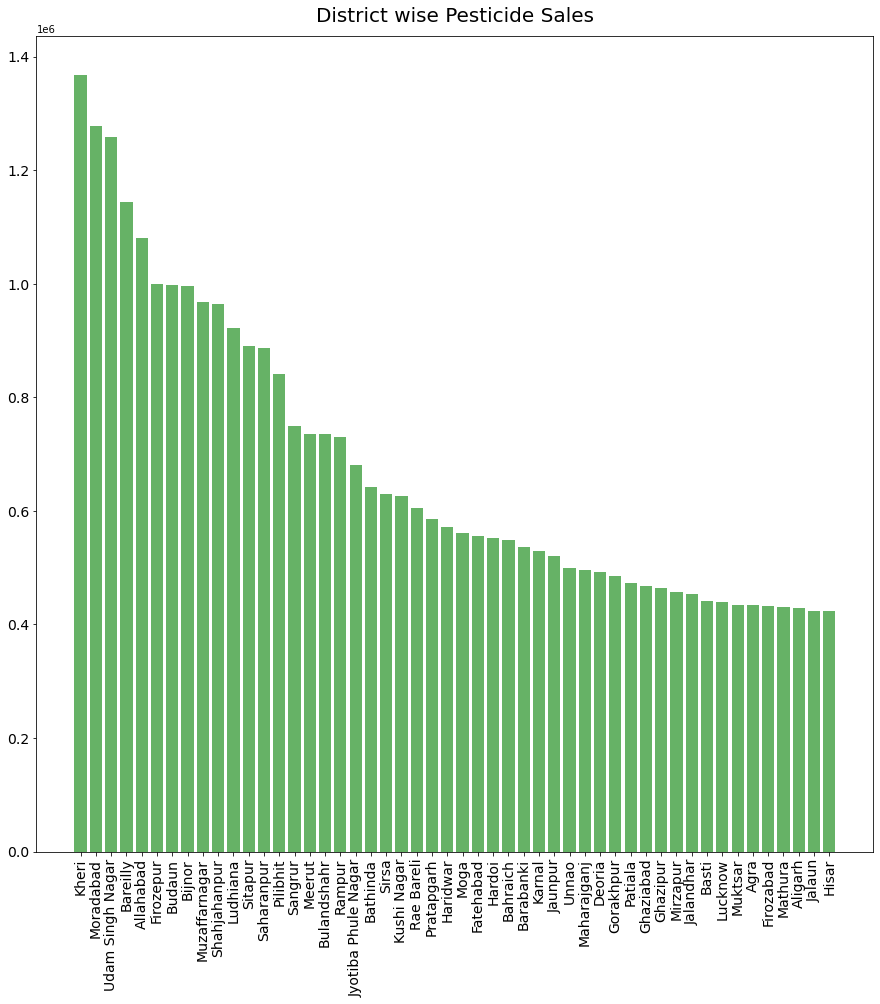

In [31]:
# DISTRICT WISE MIN/ MAX SALES

DIST= pesticide1.groupby("DISTRICT")["VALUE"]
DIST=DIST.sum().sort_values(ascending=False)[:50]
fig, ax= plt.subplots(figsize=(15,15))
ax.bar(DIST.index, DIST.values, color="green", alpha=0.6)
ax.set_title("District wise Pesticide Sales", 
            fontsize=20, y=1.01)
ax.tick_params(axis="x", labelsize=14, rotation=90)
ax.tick_params(axis="y", labelsize=14)

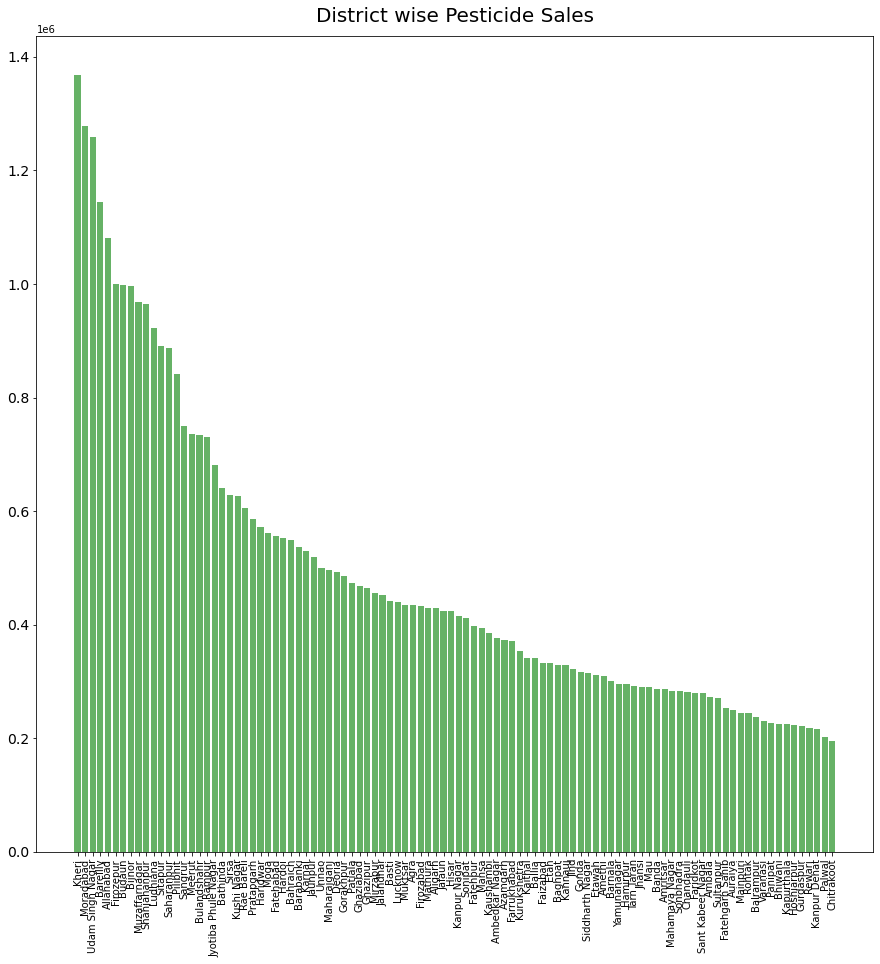

In [32]:
DIST= pesticide1.groupby("DISTRICT")["VALUE"]
DIST=DIST.sum().sort_values(ascending=False)[:100]
fig, ax= plt.subplots(figsize=(15,15))
ax.bar(DIST.index, DIST.values, color="green", alpha=0.6)
ax.set_title("District wise Pesticide Sales", 
            fontsize=20, y=1.01)
ax.tick_params(axis="x", labelsize=10, rotation=90)
ax.tick_params(axis="y", labelsize=14)

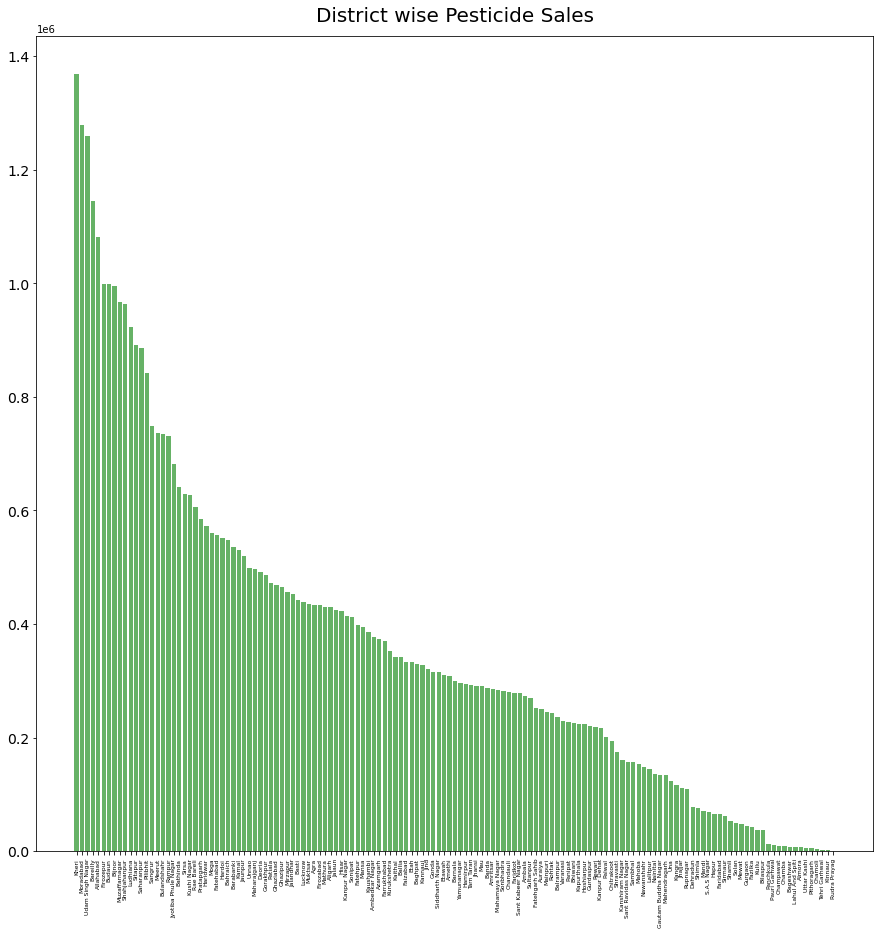

In [33]:
DIST= pesticide1.groupby("DISTRICT")["VALUE"]
DIST=DIST.sum().sort_values(ascending=False)[:150]
fig, ax= plt.subplots(figsize=(15,15))
ax.bar(DIST.index, DIST.values, color="green", alpha=0.6)
ax.set_title("District wise Pesticide Sales", 
            fontsize=20, y=1.01)
ax.tick_params(axis="x", labelsize=6, rotation=90)
ax.tick_params(axis="y", labelsize=14)

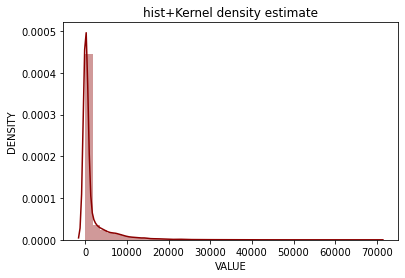

In [34]:
# the distribution hist+Kernel density estimate

sns.distplot(pesticide1['VALUE'],kde=True,color = 'darkred',bins=40)
plt.title("hist+Kernel density estimate")
plt.ylabel("DENSITY")
plt.xlabel("VALUE")
plt.show;


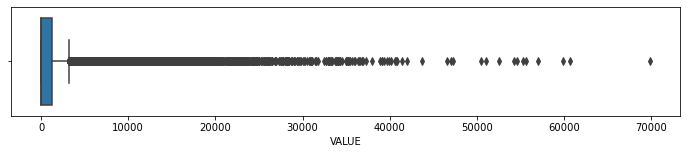

In [35]:
g = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=pesticide1['VALUE'],whis=1.5)

CHECKING CORELATIONS

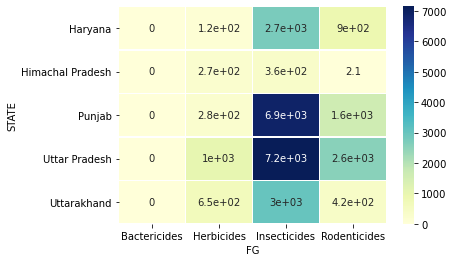

In [36]:
#CORELATION BETWEEN STATE AND DIFFERENT PESTICIDES/ FG

heatmap=pesticide1.pivot_table(values="VALUE", index='STATE', columns="FG")
sns.heatmap(heatmap,annot=True,linewidths=0.5,cmap="YlGnBu")
plt.show()

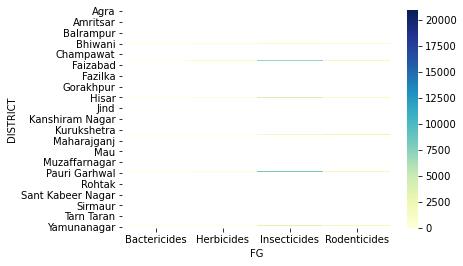

In [37]:
#Corelation between Districts and FG

heatmap=pesticide1.pivot_table(values="VALUE", index='DISTRICT', columns="FG")
sns.heatmap(heatmap,linewidths=0.5,cmap="YlGnBu")
plt.show()

# Checking if the data is Stationary by using Augmneted Dickey Fuller Test


In [38]:
X= pesticide1.VALUE
result = adfuller(X)

In [39]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.796506
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


NOW, DROPPING VARIABLES WHICH ARE NO LONGER ESSESNTIAL

In [40]:
pesticide1 = pesticide1.sort_values('MONTH_YEAR')

In [41]:
pesticide1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,YEAR,MONTH_YEAR
65737,2014-2015,Jan,Uttar Pradesh,Herbicides,Saharanpur,ABC Manufacturing,745.065,2014,2014-01-01
176311,2014-2015,Jan,Haryana,Bactericides,Ambala,ABC Manufacturing,0.000,2014,2014-01-01
7992,2014-2015,Jan,Uttar Pradesh,Insecticides,Kannauj,ABC Manufacturing,5474.385,2014,2014-01-01
7991,2014-2015,Jan,Uttar Pradesh,Insecticides,Farrukhabad,ABC Manufacturing,8374.590,2014,2014-01-01
7990,2014-2015,Jan,Uttar Pradesh,Insecticides,Lucknow,ABC Manufacturing,11043.675,2014,2014-01-01


In [42]:
data=pesticide1.drop(['FIN_YEAR','MONTH','FG','DISTRICT','COMPANY','YEAR' ],axis=1)

In [43]:
data.head()

,STATE,VALUE,MONTH_YEAR
65737,Uttar Pradesh,745.065,2014-01-01
176311,Haryana,0.000,2014-01-01
7992,Uttar Pradesh,5474.385,2014-01-01
7991,Uttar Pradesh,8374.590,2014-01-01
7990,Uttar Pradesh,11043.675,2014-01-01


In [44]:
data.shape

(28640, 3)

In [45]:
pesticide1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,YEAR,MONTH_YEAR
65737,2014-2015,Jan,Uttar Pradesh,Herbicides,Saharanpur,ABC Manufacturing,745.065,2014,2014-01-01
176311,2014-2015,Jan,Haryana,Bactericides,Ambala,ABC Manufacturing,0.000,2014,2014-01-01
7992,2014-2015,Jan,Uttar Pradesh,Insecticides,Kannauj,ABC Manufacturing,5474.385,2014,2014-01-01
7991,2014-2015,Jan,Uttar Pradesh,Insecticides,Farrukhabad,ABC Manufacturing,8374.590,2014,2014-01-01
7990,2014-2015,Jan,Uttar Pradesh,Insecticides,Lucknow,ABC Manufacturing,11043.675,2014,2014-01-01


# SEGMENTATION  ON THE BASIS OF STATES

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28640 entries, 65737 to 178878
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   STATE       28640 non-null  object        
 1   VALUE       28640 non-null  float64       
 2   MONTH_YEAR  28640 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 895.0+ KB


In [47]:
data.STATE.value_counts()

Uttar Pradesh       13024
Haryana              6028
Himachal Pradesh     3880
Punjab               3668
Uttarakhand          2040
Name: STATE, dtype: int64

In [48]:
#assigning short names to STATES

UP= data[pesticide1['STATE']==('Uttar Pradesh')]

HR=data[pesticide1['STATE'] == 'Haryana']

HP= data[pesticide1['STATE']==('Himachal Pradesh')]

PJ= data[pesticide1['STATE']==('Punjab')]

UK= data[pesticide1['STATE']==('Uttarakhand')]



In [49]:
# grouping the data on the basis of Month_year and Value

HR=HR.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()

UP=UP.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()

PJ=PJ.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()

UK=UK.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()

HP=HP.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()

In [50]:
# Set Month_year as a Index

HR=  HR.set_index('MONTH_YEAR')

UP=  UP.set_index('MONTH_YEAR')

PJ=  PJ.set_index('MONTH_YEAR')

UK=  UK.set_index('MONTH_YEAR')

HP=  HP.set_index('MONTH_YEAR')

In [51]:
# check if their is any missing value in data 

HR.isnull().sum()

VALUE    0
dtype: int64

In [52]:
UP.isnull().sum()

VALUE    0
dtype: int64

In [53]:
PJ.isnull().sum()

VALUE    0
dtype: int64

In [54]:
UK.isnull().sum()

VALUE    0
dtype: int64

In [190]:
HP.isnull().sum()

VALUE    0
dtype: int64

# Resampling the data based on MS- Monthly Start

In [56]:
#Resample the data on Monthly basis for different states

y= UP['VALUE'].resample('MS').mean()

y1= HR['VALUE'].resample('MS').mean()

y2= PJ['VALUE'].resample('MS').mean()

y3= UK['VALUE'].resample('MS').mean()

y4= HP['VALUE'].resample('MS').mean()

In [57]:
y.isnull().sum()

2

In [58]:
y=y.fillna(y.mean())

In [59]:
y1.isnull().sum()

2

In [60]:
y1=y1.fillna(y1.mean())

In [61]:
y2.isnull().sum()

2

In [62]:
y2=y2.fillna(y2.mean())

In [63]:
y3.isnull().sum()

2

In [64]:
y3=y3.fillna(y3.mean())

In [65]:
y4.isnull().sum()

2

In [66]:
y4=y4.fillna(y4.mean())

In [67]:
HP

,VALUE
MONTH_YEAR,
2014-01-01,21497.670
2014-02-01,12344.535
2014-03-01,2396.790
2014-04-01,6969.780
2014-05-01,10023.480
2014-06-01,18159.390
2014-07-01,14409.630
2014-08-01,7495.875
2014-09-01,165.375


# Visualizing Pesticides Sales as per States

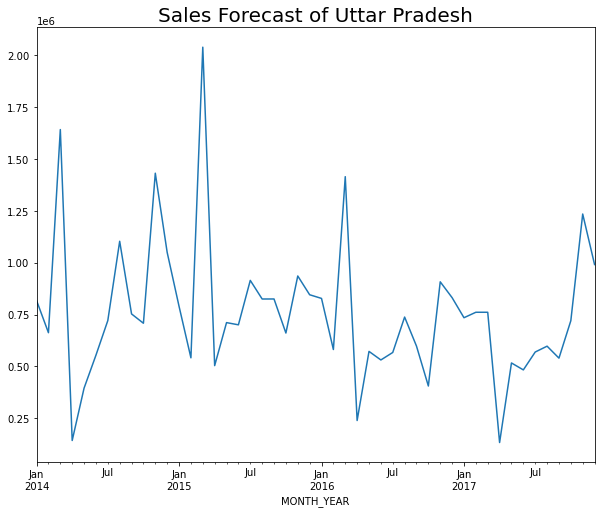

In [68]:
# UP sales
y.plot(figsize=(10,8))
plt.title('Sales Forecast of Uttar Pradesh', fontsize=20)
plt.show()


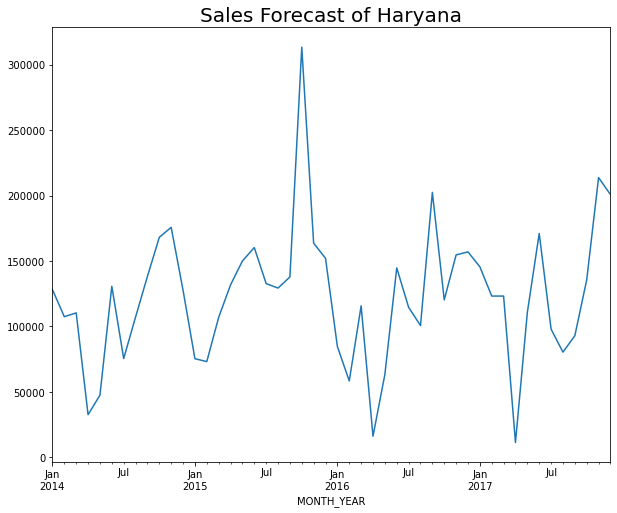

In [69]:
#Haryana state
y1.plot(figsize=(10,8))
plt.title('Sales Forecast of Haryana', fontsize=20)
plt.show()

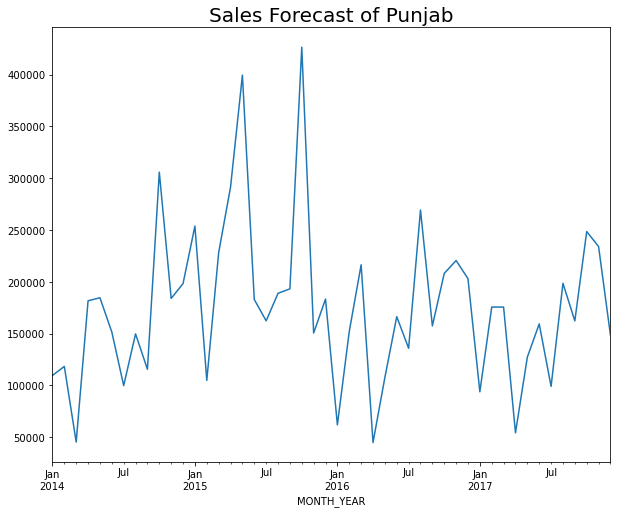

In [70]:
#Punjab sales
y2.plot(figsize=(10,8))
plt.title('Sales Forecast of Punjab', fontsize=20)
plt.show()

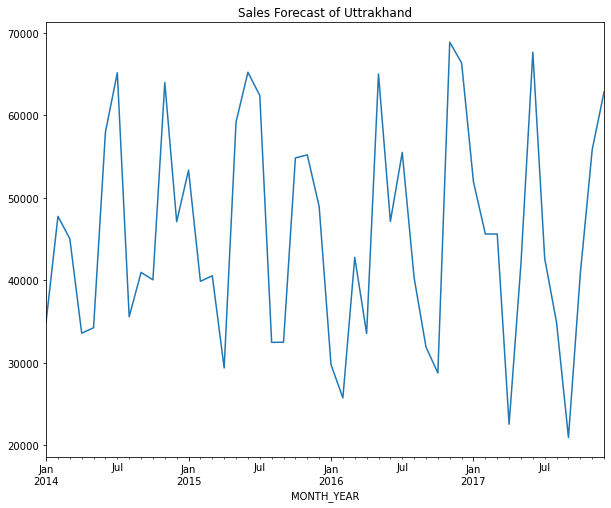

In [71]:
#Uttrakhand sales
y3.plot(figsize=(10,8))
plt.title('Sales Forecast of Uttrakhand')
plt.show()

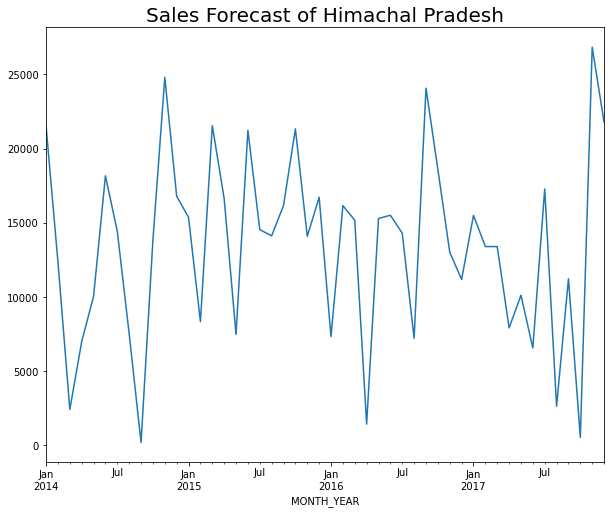

In [72]:
#Himachal Pradesh state
y4.plot(figsize=(10,8))
plt.title('Sales Forecast of Himachal Pradesh', fontsize=20)
plt.show()

# DECOMPOSITION

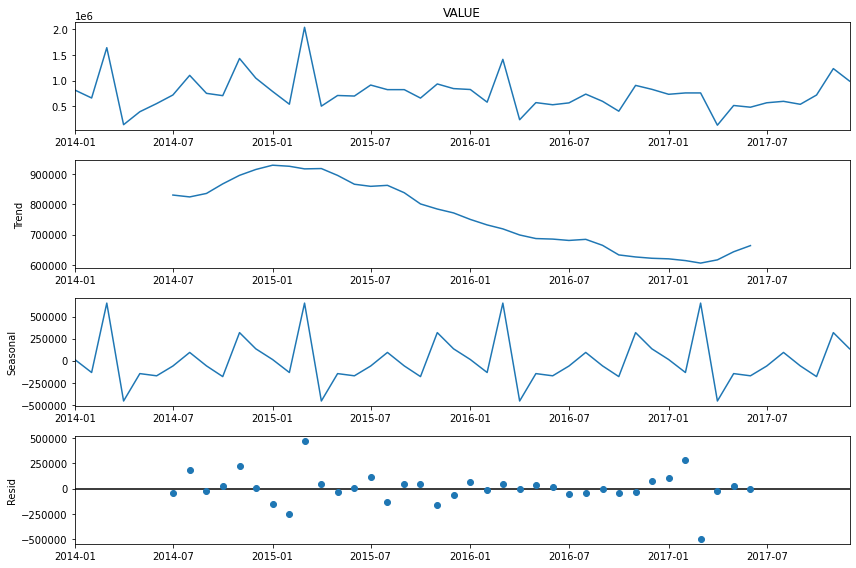

In [73]:
from pylab import rcParams
import statsmodels.api as sm


# UTTAR PRADESH 
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y,model= 'additive')
fig= decomposition.plot()

plt.show()

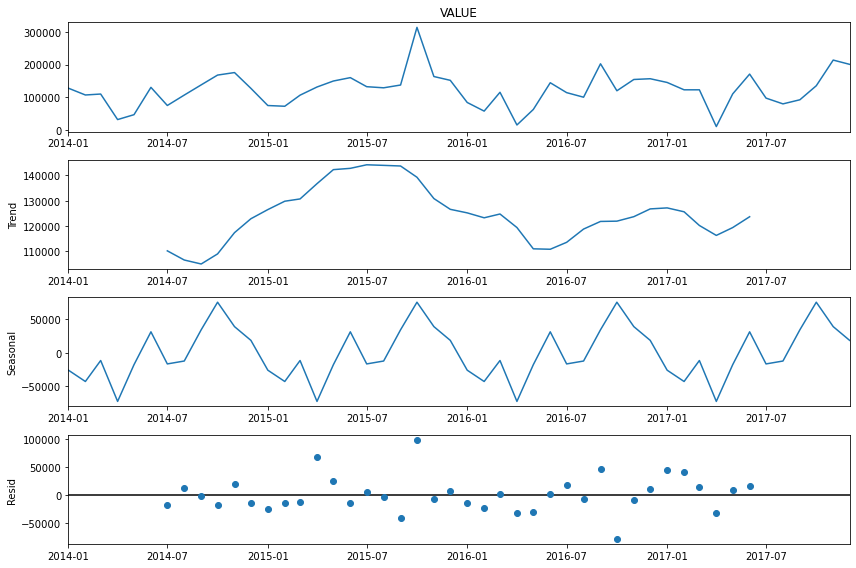

In [74]:
# HARAYANA

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y1,model= 'additive')
fig= decomposition.plot()
plt.show()

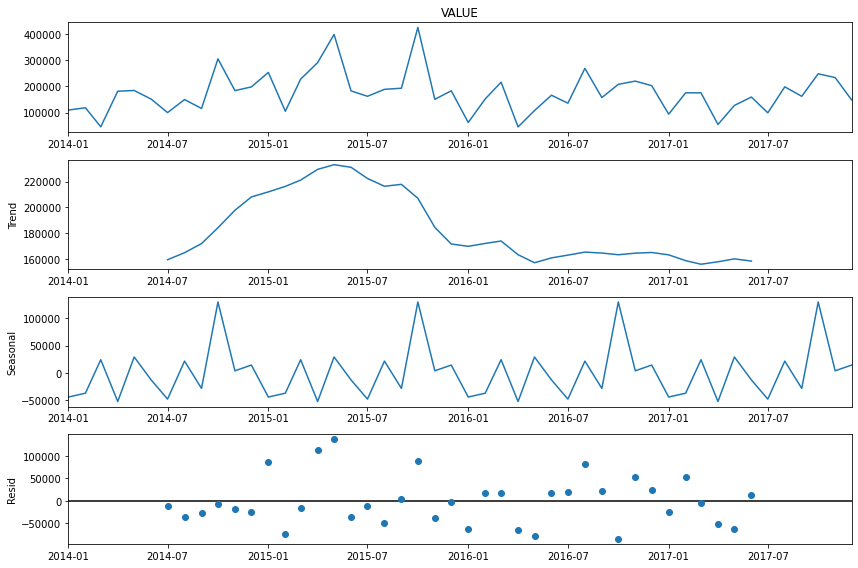

In [75]:
#Punjab state
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y2,model= 'additive')
fig= decomposition.plot()
plt.show()

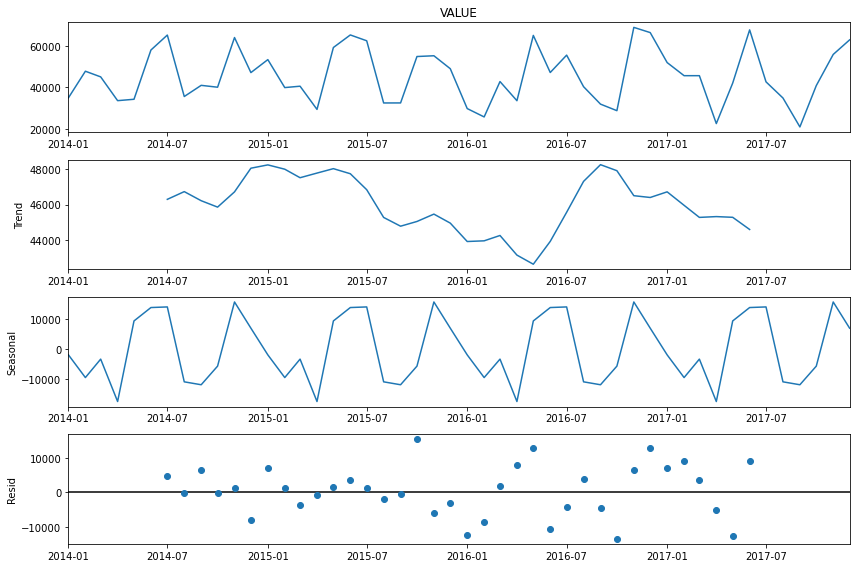

In [76]:
#Uttrakhand
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y3,model= 'additive')
fig= decomposition.plot()
plt.show()

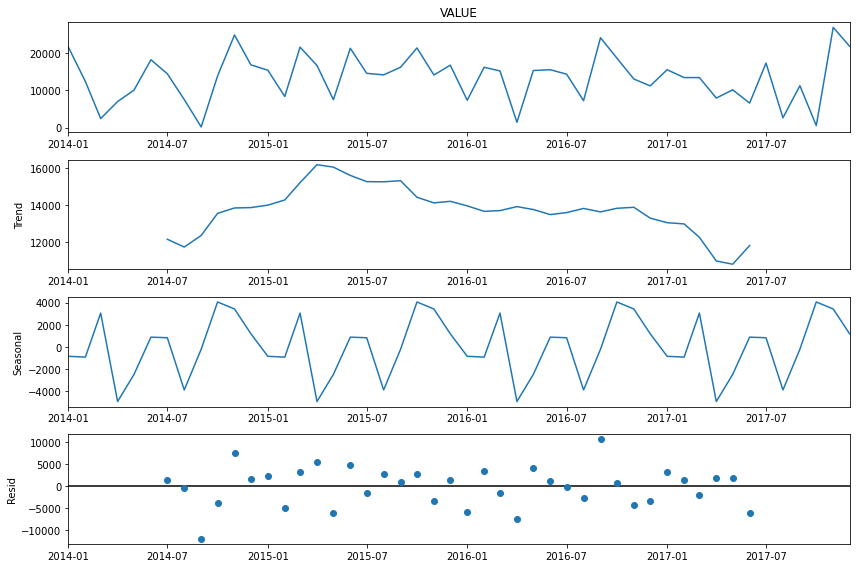

In [77]:
#Himachal Pradesh
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y4,model= 'additive')
fig= decomposition.plot()
plt.show()

# Split the Train and Test Data based on States

In [78]:
train_len = 38
train = y[0:train_len]
test = y[train_len:]

In [79]:
train_len1 = 38
train1 = y1[0:train_len1]
test1 = y1[train_len1:]

In [80]:
train_len2 = 38
train2 = y2[0:train_len2]
test2 = y2[train_len2:]

In [81]:
train_len3 = 38
train3 = y3[0:train_len3]
test3 = y3[train_len3:]

In [82]:
train_len4 = 38
train4 = y4[0:train_len4]
test4 = y4[train_len4:]

In [83]:
train

MONTH_YEAR
2014-01-01    8.174196e+05
2014-02-01    6.624096e+05
2014-03-01    1.641844e+06
2014-04-01    1.426950e+05
2014-05-01    3.950837e+05
2014-06-01    5.538621e+05
2014-07-01    7.209281e+05
2014-08-01    1.103309e+06
2014-09-01    7.529047e+05
2014-10-01    7.080215e+05
2014-11-01    1.431477e+06
2014-12-01    1.049625e+06
2015-01-01    7.897299e+05
2015-02-01    5.413373e+05
2015-03-01    2.039067e+06
2015-04-01    5.036656e+05
2015-05-01    7.111113e+05
2015-06-01    7.004143e+05
2015-07-01    9.146625e+05
2015-08-01    8.248927e+05
2015-09-01    8.250324e+05
2015-10-01    6.608137e+05
2015-11-01    9.358889e+05
2015-12-01    8.454330e+05
2016-01-01    8.277590e+05
2016-02-01    5.813220e+05
2016-03-01    1.414752e+06
2016-04-01    2.390008e+05
2016-05-01    5.722913e+05
2016-06-01    5.310009e+05
2016-07-01    5.671150e+05
2016-08-01    7.378547e+05
2016-09-01    5.978146e+05
2016-10-01    4.053970e+05
2016-11-01    9.077540e+05
2016-12-01    8.313380e+05
2017-01-01    7.3

In [84]:
test

MONTH_YEAR
2017-03-01    7.609707e+05
2017-04-01    1.328972e+05
2017-05-01    5.165157e+05
2017-06-01    4.830891e+05
2017-07-01    5.692719e+05
2017-08-01    5.974669e+05
2017-09-01    5.397751e+05
2017-10-01    7.202959e+05
2017-11-01    1.234664e+06
2017-12-01    9.910065e+05
Freq: MS, Name: VALUE, dtype: float64

In [85]:
train.isnull().sum()

0

In [86]:
test.isnull().sum()

0

In [87]:
train1.isnull().sum()

0

In [88]:
test1.isnull().sum()

0

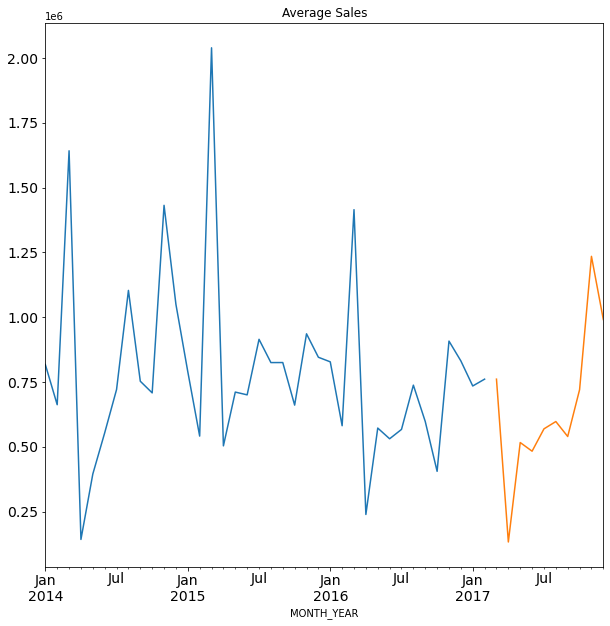

In [89]:
#Plotting the data 
train.plot(figsize=(10,10), title='Average Sales',fontsize=14)
test.plot(figsize=(10,10), title='Average Sales',fontsize=14)
plt.show;

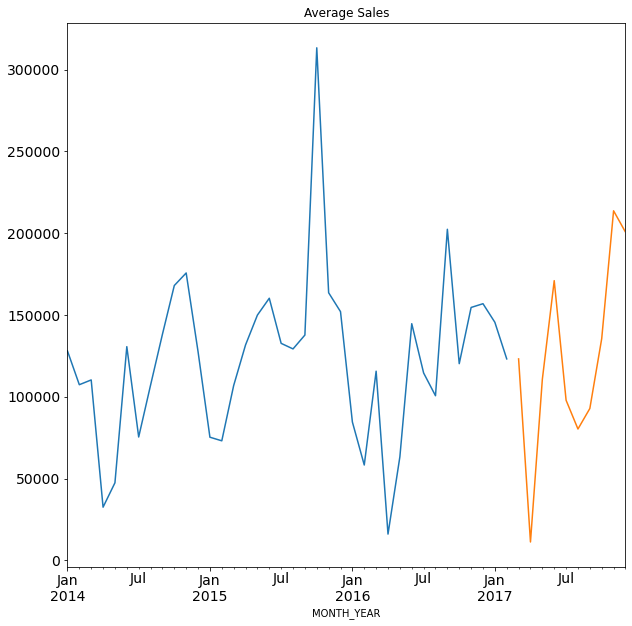

In [90]:
#Plotting the data 
train1.plot(figsize=(10,10), title='Average Sales',fontsize=14)
test1.plot(figsize=(10,10), title='Average Sales',fontsize=14)
plt.show;

In [91]:
train.shape

(38,)

In [92]:
test.shape

(10,)

# MODEL BUILDING

# Holt Winters' additive method with trend and seasonality

In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


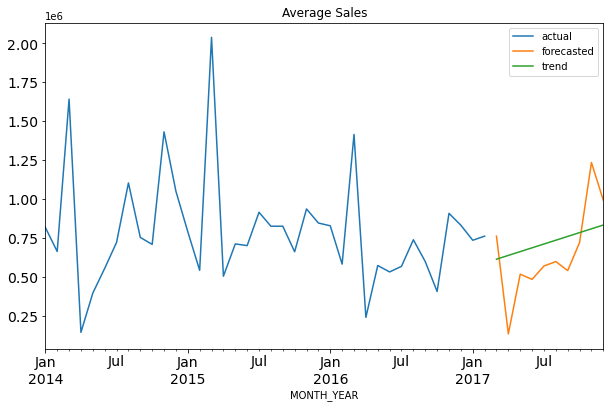

In [94]:
# bulid Holt model
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.5)
Holt_df['Holt_linear'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14,label="actual")
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14, label="forecasted")
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14, label="trend")
plt.savefig("bulid Holt model.pdf")

plt.legend(loc='best')
plt.show()



In [95]:
fit1.aic

986.0806266498759

In [96]:
# check rmse value of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rms)

252330.73628937863


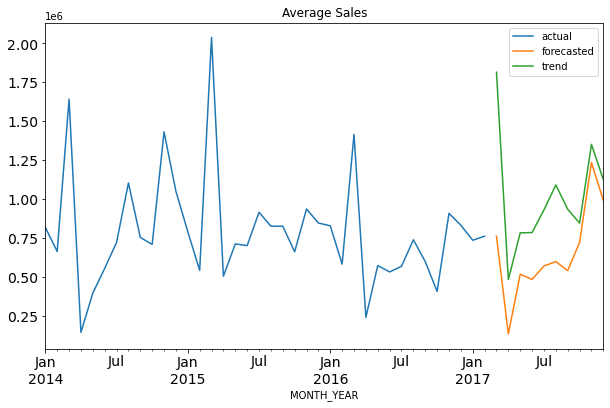

In [97]:
# bulid Holt-Winter model

from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14,label="actual")
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14,label="forecasted")
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14, label="trend")
plt.savefig("bulid Holt-Winter model.pdf")

plt.legend(loc='best')
plt.show()

In [98]:
# check rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

443910.7201728514


In [99]:
fit1.aic

934.519001191787

# ARIMA MODEL

In [100]:
# import package for ARIMA model
import pmdarima as pm

In [101]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1374.692, Time=1.89 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1343.380, Time=0.81 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1331.671, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1372.705, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1348.087, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1330.036, Time=0.21 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1328.282, Time=0.13 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1330.182, Time=0.49 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1331.731, Time=0.68 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1355.386, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1330.053, Time=0.13 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1333.941, Time=0.19 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1333.345, Time=0.50 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1325.971, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0

In [102]:
model.aic()

1325.9710922264524

In [103]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -659.986
Date:                             Fri, 23 Sep 2022   AIC                           1325.971
Time:                                     22:50:27   BIC                           1331.522
Sample:                                 01-01-2014   HQIC                          1328.060
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7571      0.108     -7.000      0.000      -0.969      -0.545
ar.S.L12       0.6395      

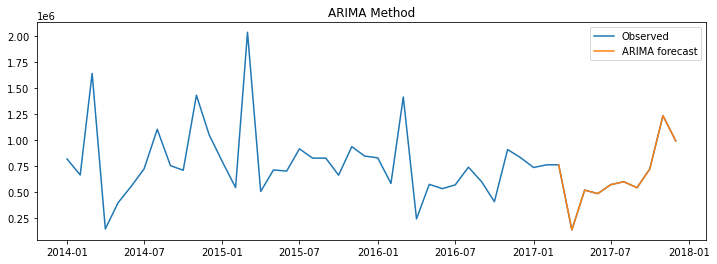

In [104]:
plt.figure(figsize=(12,4))
plt.plot(y, label='Observed')
plt.plot(test, label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()


#  SARIMA MODEL

In [105]:
import itertools #tools which hepls to iterate over multiple objects
#like we said we said we can do diff multiple times, in arima p,q,d can be multiple
#so we use this tools to have diff combinations of p,q,d

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


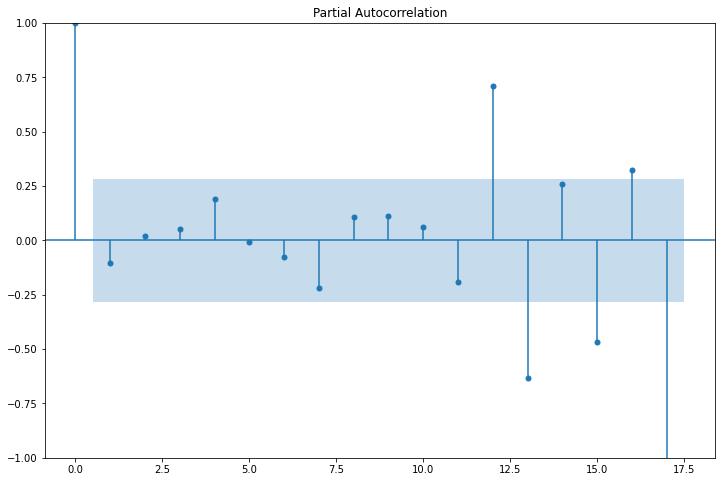

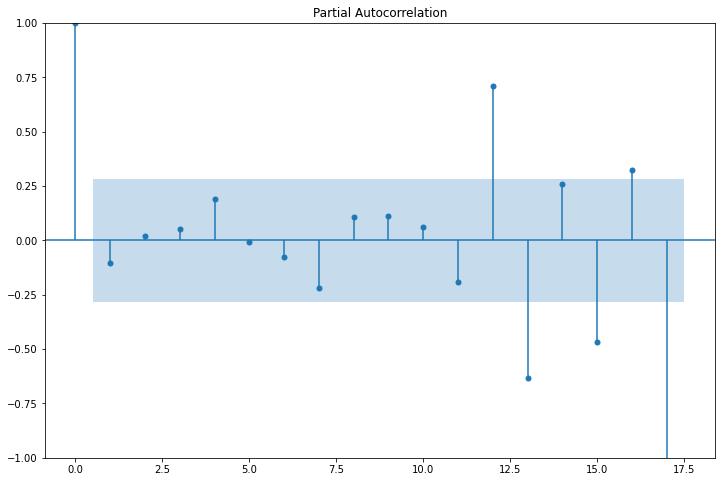

In [106]:
plot_pacf(y)

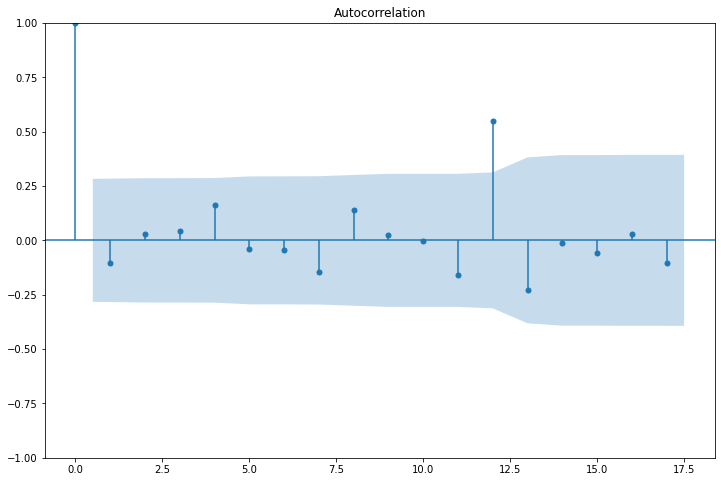

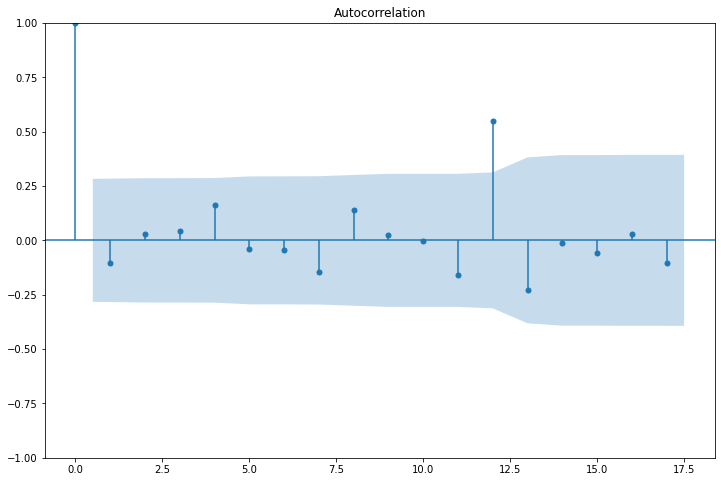

In [107]:
plot_acf(y)

# GRID SEARCH

In [108]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [109]:
# FOR Y- UTTAR PRADESH


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1417.3184062410025
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10200394.480988277
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:975.5291706495846
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:631.8946914825323
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:996.1382897285462
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9576062.276469234
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:668.6220156951653
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:633.3202533808472
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1371.1397758974854
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9761569.607289962
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:944.9331383038494
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:606.7253087882153
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1055.0059384896958
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:9137408.228312008
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:668.7882225549686
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:608.126416567199
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1344.47136595794
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4334185.397744605
ARIMA(0,

In [110]:
# FOR Y1- HARYANA

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results1 = mod1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1245.098054866258
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:164592.6437295413
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:877.2222052929242
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:567.4127945490004
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:901.2864818158962
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:158720.62317026025
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:590.5363520316673
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:568.5450203131469
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1195.0366492079866
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:138821.92903780818
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:852.5582905889171
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:545.6768946296307
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:928.8779663527177
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:124509.04299732421
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:594.9913993009852
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:546.7194262709046
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1145.394934116938
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:27081.0338973799
ARIMA(0

In [111]:
#FOR Y2- PUNJAB

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(y2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results2 = mod2.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results2.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1279.4901695971
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:385786.15633764054
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:911.6246053697728
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:588.1210848956206
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:936.5120205085847
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:320888.73166069825
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:617.9268401425766
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:590.0892546622082
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1233.5704826346657
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:362882.2236068459
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:884.1585583181834
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:561.0380014248364
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:956.8104983935607
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:297891.0041350093
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:620.3113025834273
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:562.960450574712
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1194.3259834192156
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:88655.52654973709
ARIMA(0, 

In [112]:
# FOR Y3- UTTRAKHAND

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod3 = sm.tsa.statespace.SARIMAX(y3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results3 = mod3.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results3.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1147.9555901566498
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1506.2808929925427
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:766.0523608545419
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:502.71882352020793
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:789.9207929531101
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1383.4214858557934
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:521.2804218953762
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:502.240310480418
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1098.027643411248
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:27775.600398839542
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:746.7912866928651
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:483.3310898654572
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:848.8128821493377
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:24321.713198641635
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:524.5059585008502
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:482.12495760782906
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1026.5146068618278
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1138.7659597946729
AR

In [113]:
# FOR Y4- HIMACHAL PRADESH

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod4 = sm.tsa.statespace.SARIMAX(y4,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results4 = mod4.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results4.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1036.9779787696677
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1706.7180684037205
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:736.481540161292
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:479.673540390023
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:755.715463877066
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4671.605215586562
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:503.8214001328845
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:481.5212496232992
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:999.0578345891055
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4898.458327352231
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:718.4488193264917
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:460.1587959747171
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:757.4339187898282
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4286.01748866251
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:505.2453746900395
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:461.77505267633137
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:968.6341042997312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.537156063368
ARIMA(0, 1,

# FITTING THE MODEL

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [115]:
# UTTAR PRADESH
mod = SARIMAX(y,
                order=(0,1,1),
                 seasonal_order=(0,1,1,12)).fit()

In [116]:
print(mod.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -484.713
Date:                            Fri, 23 Sep 2022   AIC                            975.425
Time:                                    22:52:21   BIC                            980.091
Sample:                                01-01-2014   HQIC                           977.036
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5396      0.089     -6.061      0.000      -0.714      -0.365
ma.S.L12      -0.7063      0.200   

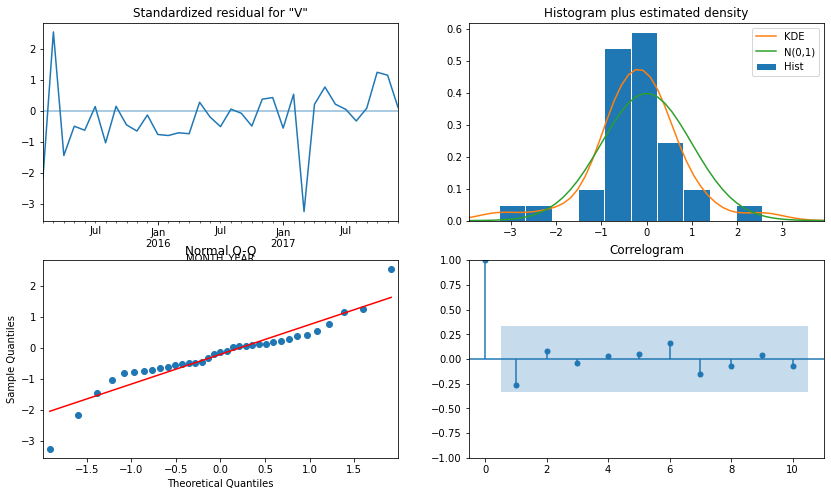

In [117]:
mod.plot_diagnostics(figsize=(14, 8))
plt.show()

In [118]:
mod.aic

975.4253029205298

In [119]:
#HARYANA
mod1 = SARIMAX(y1,
                order=(0,1,1),
                 seasonal_order=(0,1,1,12)).fit()
print(mod1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -434.718
Date:                            Fri, 23 Sep 2022   AIC                            875.437
Time:                                    22:52:25   BIC                            880.103
Sample:                                01-01-2014   HQIC                           877.048
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5921      0.225     -2.626      0.009      -1.034      -0.150
ma.S.L12      -0.6332      0.342   

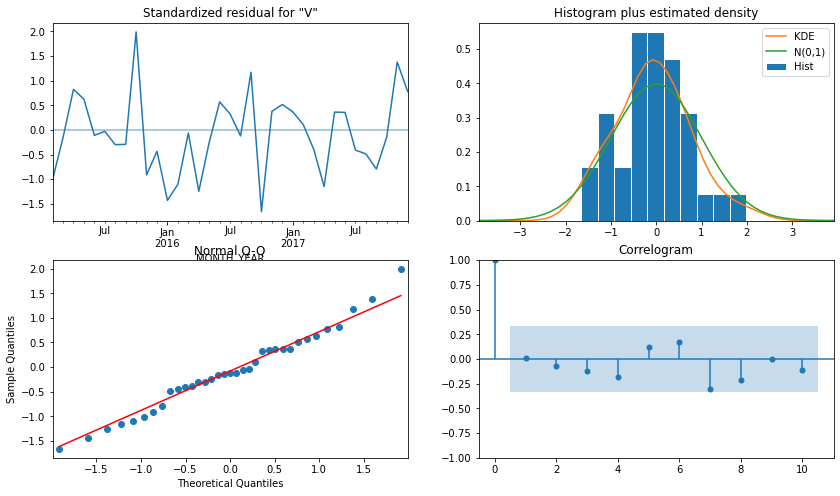

In [120]:
mod1.plot_diagnostics(figsize=(14, 8))
plt.show()

In [121]:
mod1.aic

875.4369220745239

In [122]:
#PUNJAB
mod2 = SARIMAX(y2,
                order=(0,1,1),
                 seasonal_order=(0,1,1,12)).fit()
print(mod2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -450.780
Date:                            Fri, 23 Sep 2022   AIC                            907.561
Time:                                    22:52:29   BIC                            912.227
Sample:                                01-01-2014   HQIC                           909.172
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6605      0.197     -3.355      0.001      -1.046      -0.275
ma.S.L12      -0.6216      0.342   

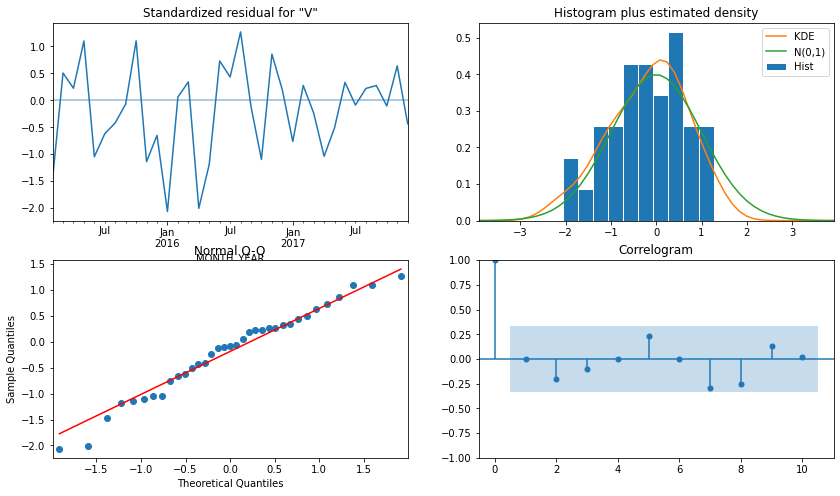

In [123]:
mod2.plot_diagnostics(figsize=(14, 8))
plt.show()

In [124]:
mod2.aic

907.5608893145815

In [125]:
#UTTRAKHAND
mod3 = SARIMAX(y3,
                order=(0,1,1),
                 seasonal_order=(0,1,1,12)).fit()
print(mod3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -386.087
Date:                            Fri, 23 Sep 2022   AIC                            778.174
Time:                                    22:52:33   BIC                            782.840
Sample:                                01-01-2014   HQIC                           779.785
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4886      0.153     -3.198      0.001      -0.788      -0.189
ma.S.L12      -0.5879      0.296   

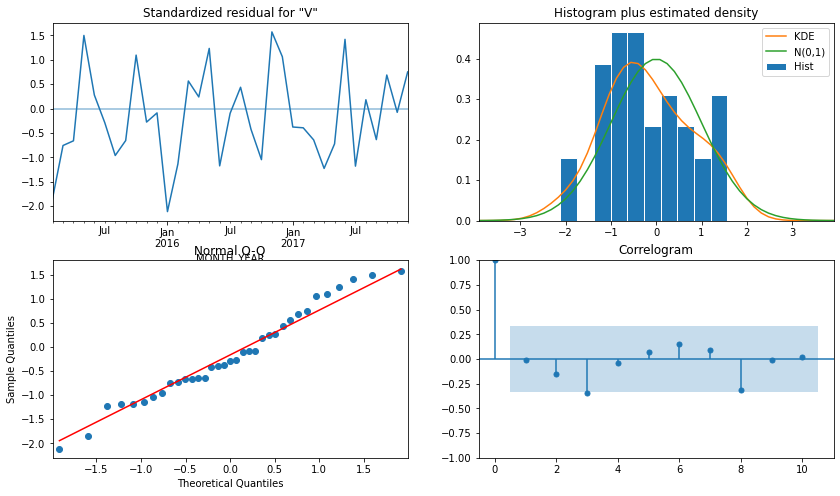

In [126]:
mod3.plot_diagnostics(figsize=(14, 8))
plt.show()

In [127]:
mod3.aic

778.1739408168322

In [128]:
#HIMACHAL PRADESH
mod4 = SARIMAX(y4,
                order=(0,1,1),
                 seasonal_order=(0,1,1,12)).fit()
print(mod4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -365.427
Date:                            Fri, 23 Sep 2022   AIC                            736.855
Time:                                    22:52:36   BIC                            741.521
Sample:                                01-01-2014   HQIC                           738.465
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7693      0.171     -4.509      0.000      -1.104      -0.435
ma.S.L12      -0.6504      0.546   

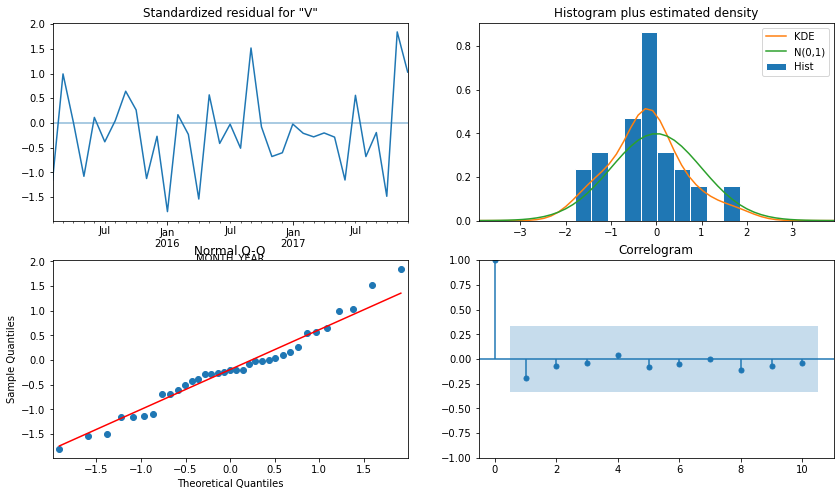

In [129]:
mod4.plot_diagnostics(figsize=(14, 8))
plt.show()

In [130]:
mod4.aic

736.854747628255

# VALIDATION OF FORECASTS

To check the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

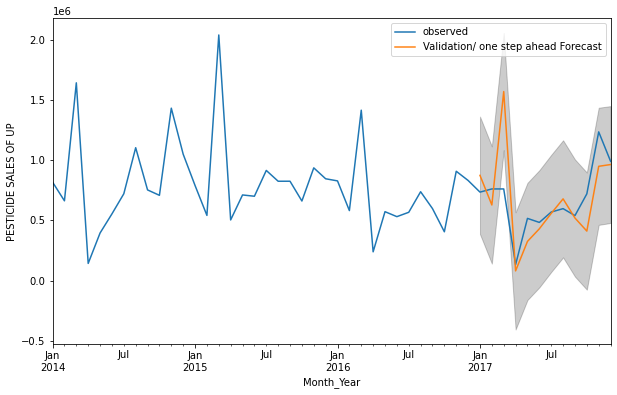

In [131]:
# perform validation forecast model on given data 

# mod 
pred =mod.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation/ one step ahead Forecast', alpha=10)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Month_Year')
ax.set_ylabel('PESTICIDE SALES OF UP')
plt.legend()
plt.show()

In [132]:
y_forecasted = pred.predicted_mean
y_test = y['2017-01-01':]
mse = ((y_forecasted - y_test)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 76480456623.54


In [133]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 3)))

The Root Mean Squared Error of our forecasts is 276551.002


In [134]:
mape_s = np.round(np.mean(np.abs(y_test-y_forecasted)/y_test)*100,2); mape_s

26.5

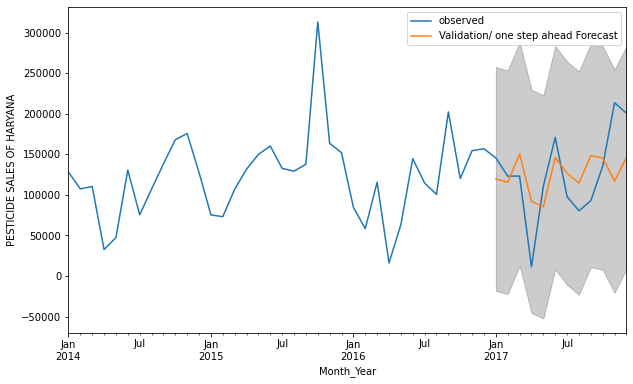

In [135]:
# MOD1
pred1 =mod1.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci1 = pred1.conf_int()
plt.figure(figsize=(10,6))
ax = y1['2014':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='Validation/ one step ahead Forecast', alpha=10)
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Month_Year')
ax.set_ylabel('PESTICIDE SALES OF HARYANA')
plt.legend()
plt.show()

In [136]:
y_forecasted1 = pred1.predicted_mean
y_test1 = y1['2017-01-01':]
mse1 = ((y_forecasted1 - y_test1)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse1, 2)))

The Mean Squared Error of our forecasts is 2236905287.96


In [137]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse1), 3)))

The Root Mean Squared Error of our forecasts is 47295.933


In [138]:
mape_s1 = np.round(np.mean(np.abs(y_test1-y_forecasted1)/y_test1)*100,2)
print(mape_s1)

84.23


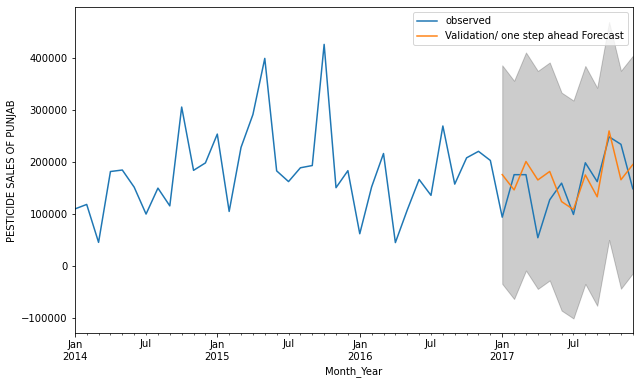

In [139]:
# MOD2

pred2 =mod2.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci2 = pred2.conf_int()
plt.figure(figsize=(10,6))
ax = y2['2014':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='Validation/ one step ahead Forecast', alpha=10)
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Month_Year')
ax.set_ylabel('PESTICIDE SALES OF PUNJAB')
plt.legend()
plt.show()

In [140]:
y_forecasted2 = pred2.predicted_mean
y_test2 = y2['2017-01-01':]
mse2 = ((y_forecasted2 - y_test2)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse2, 2)))

The Mean Squared Error of our forecasts is 2774534366.36


In [141]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse2), 3)))

The Root Mean Squared Error of our forecasts is 52673.849


In [142]:
mape_s2 = np.round(np.mean(np.abs(y_test2-y_forecasted2)/y_test2)*100,2)
print(mape_s2)

41.16


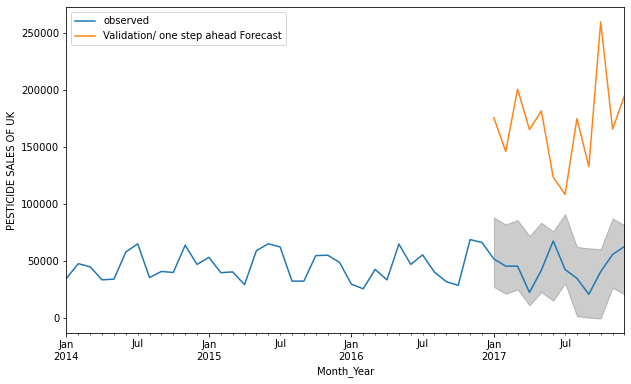

In [143]:
#MOD 3

pred3 =mod3.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci3 = pred3.conf_int()
plt.figure(figsize=(10,6))
ax = y3['2014':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='Validation/ one step ahead Forecast', alpha=10)
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Month_Year')
ax.set_ylabel('PESTICIDE SALES OF UK')
plt.legend()
plt.show()

In [144]:
y_forecasted3 = pred3.predicted_mean
y_test3 = y3['2017-01-01':]
mse3 = ((y_forecasted3 - y_test3)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse3, 2)))

The Mean Squared Error of our forecasts is 153643685.18


In [145]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse3), 3)))

The Root Mean Squared Error of our forecasts is 12395.309


In [146]:
mape_s3 = np.round(np.mean(np.abs(y_test3-y_forecasted3)/y_test3)*100,2); mape_s3

28.0

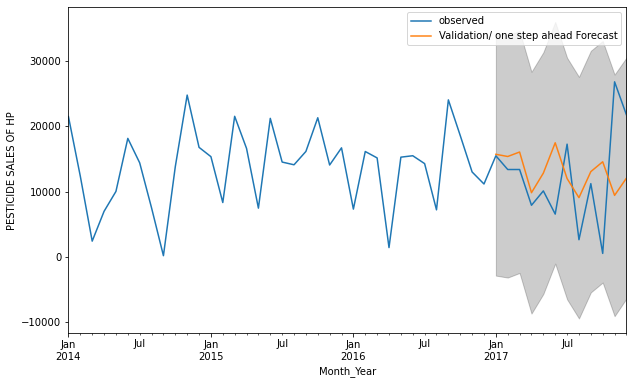

In [147]:
# MOD4

pred4 =mod4.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci4 = pred4.conf_int()
plt.figure(figsize=(10,6))
ax = y4['2014':].plot(label='observed')
pred4.predicted_mean.plot(ax=ax, label='Validation/ one step ahead Forecast', alpha=10)
ax.fill_between(pred_ci4.index,
                pred_ci4.iloc[:, 0],
                pred_ci4.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Month_Year')
ax.set_ylabel('PESTICIDE SALES OF HP')
plt.legend()
plt.show()

In [148]:
y_forecasted4 = pred4.predicted_mean
y_test4 = y4['2017-01-01':]
mse4 = ((y_forecasted4 - y_test4)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse4, 2)))

The Mean Squared Error of our forecasts is 67530496.56


In [149]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse4), 3)))

The Root Mean Squared Error of our forecasts is 8217.694


In [150]:
mape_s4 = np.round(np.mean(np.abs(y_test4-y_forecasted4)/y_test4)*100,2)
print(mape_s4)

283.45


# PREDICTION FOR NEXT 5 MONTHS- STATEWISE

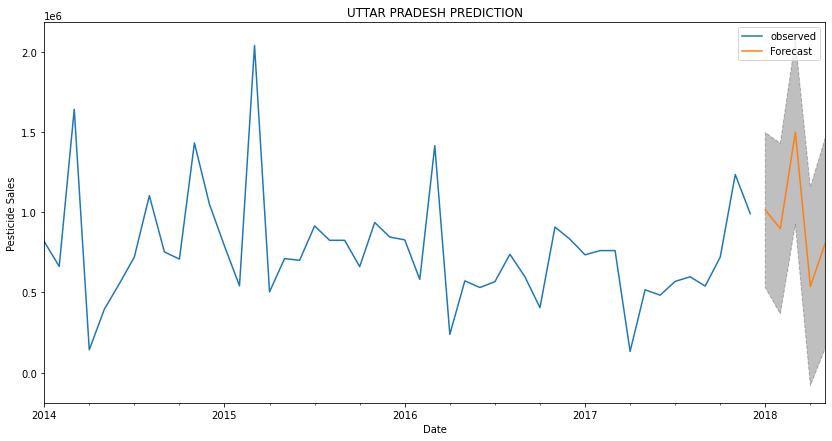

In [151]:
pred_uc = mod.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed',figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.title('UTTAR PRADESH PREDICTION')
plt.legend()
plt.show()

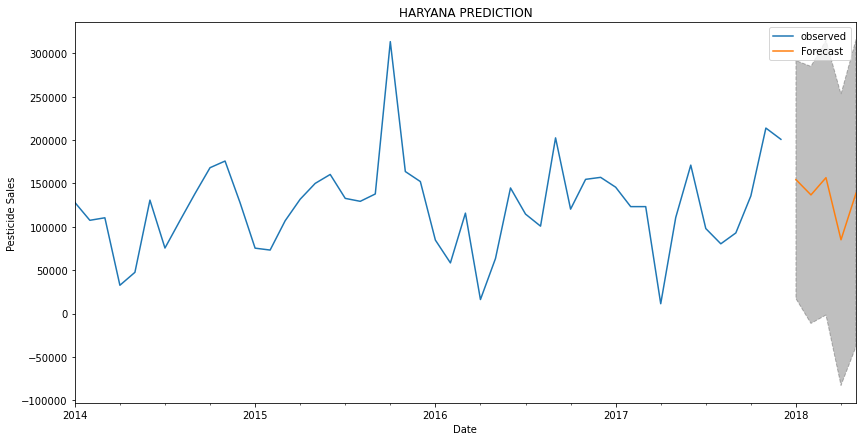

In [152]:
pred_uc1 = mod1.get_forecast(steps=5)
pred_ci1 = pred_uc1.conf_int()
ax = y1.plot(label='observed',figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.title("HARYANA PREDICTION")
plt.legend()
plt.show()


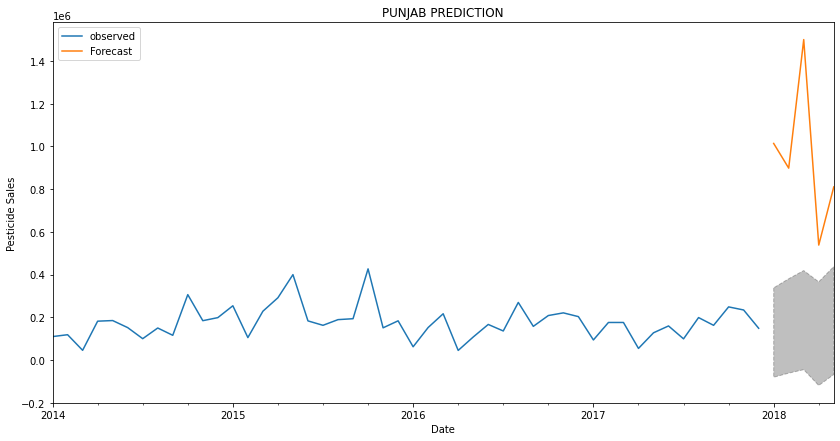

In [153]:
pred_uc2 = mod2.get_forecast(steps=5)
pred_ci2 = pred_uc2.conf_int()
ax = y2.plot(label='observed',figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.title('PUNJAB PREDICTION')
plt.legend()
plt.show()

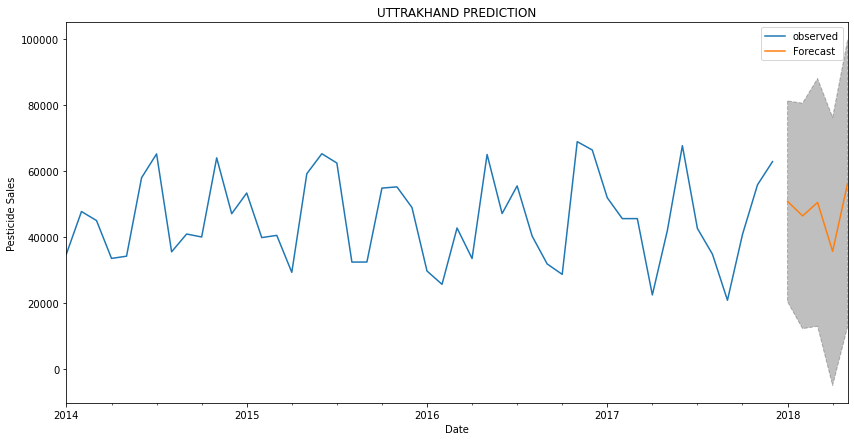

In [154]:
pred_uc3 = mod3.get_forecast(steps=5)
pred_ci3 = pred_uc3.conf_int()
ax = y3.plot(label='observed',figsize=(14, 7))
pred_uc3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.title("UTTRAKHAND PREDICTION")
plt.legend()
plt.show()

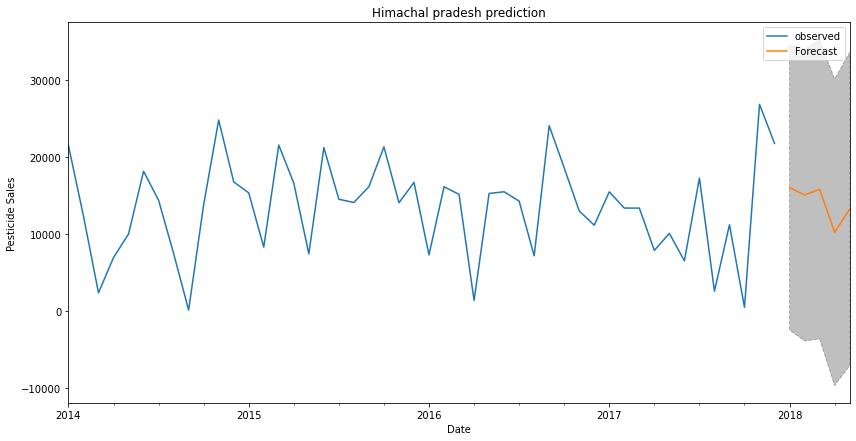

In [155]:
pred_uc4 = mod4.get_forecast(steps=5)
pred_ci4 = pred_uc4.conf_int()
ax = y4.plot(label='observed',figsize=(14, 7))
pred_uc4.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci4.index,
                pred_ci4.iloc[:, 0],
                pred_ci4.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.title("Himachal pradesh prediction")
plt.legend()
plt.show()

# VISUALISING FORECASTS

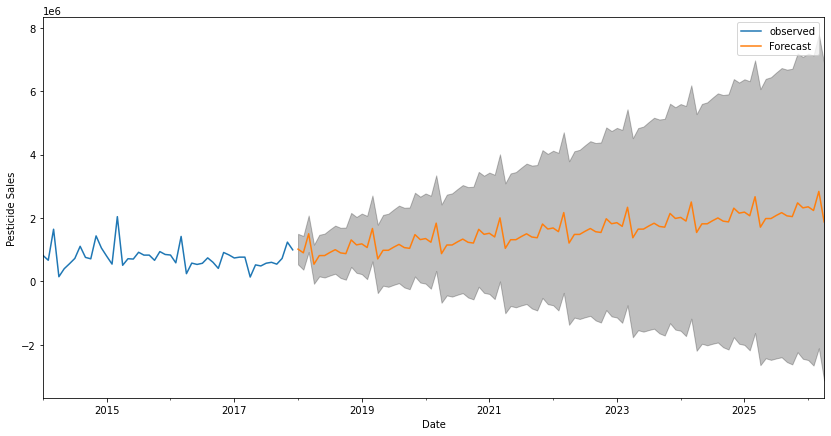

In [156]:
pred_uc = mod.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

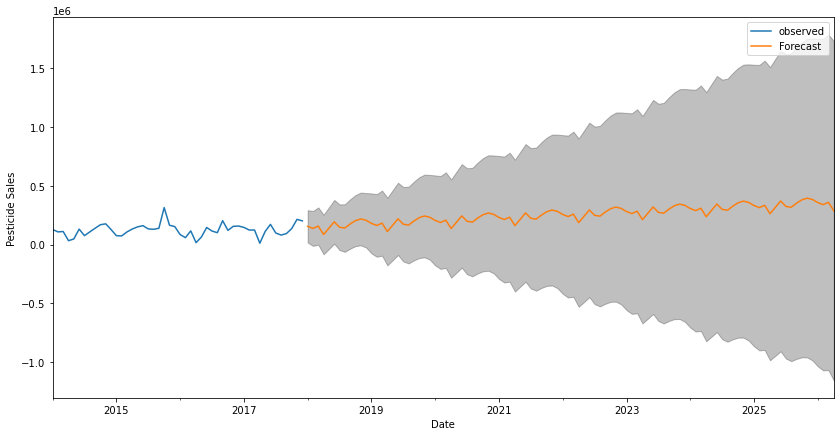

In [157]:
pred_uc1 = mod1.get_forecast(steps=100)
pred_ci1 = pred_uc1.conf_int()
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

# FORECASTING FOR 2018

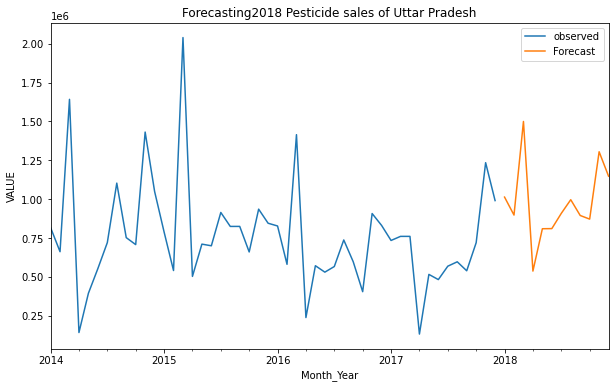

In [158]:
# Forecasting2018 pesticide sales 

pred_uc_2018 = mod.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc_2018.predicted_mean.plot(ax=ax, label='Forecast')

plt.title("Forecasting2018 Pesticide sales of Uttar Pradesh")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting2018 Pesticide sales.pdf")
plt.show()





In [159]:
# check forecast2018 data 
Y_predictions=pred_uc_2018.predicted_mean
Y_predictions

2018-01-01    1.013486e+06
2018-02-01    8.978992e+05
2018-03-01    1.499609e+06
2018-04-01    5.377739e+05
2018-05-01    8.100428e+05
2018-06-01    8.108822e+05
2018-07-01    9.087621e+05
2018-08-01    9.966933e+05
2018-09-01    8.952643e+05
2018-10-01    8.718964e+05
2018-11-01    1.304934e+06
2018-12-01    1.147830e+06
Freq: MS, Name: predicted_mean, dtype: float64

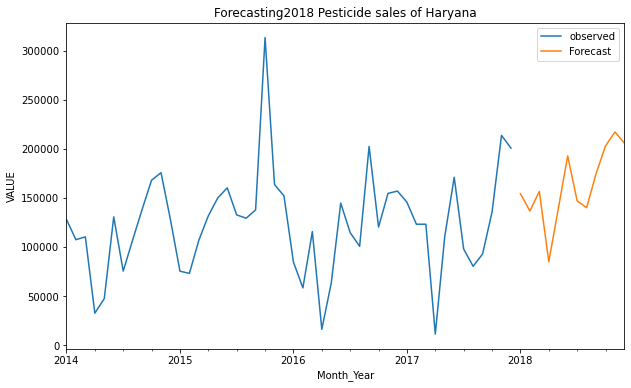

In [160]:
pred_uc1_2018 = mod1.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y1['2014':].plot(label='observed')
pred_uc1_2018.predicted_mean.plot(ax=ax, label='Forecast')

plt.title("Forecasting2018 Pesticide sales of Haryana")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting2018 Pesticide sales.pdf")
plt.show()


In [161]:
# check forecast2018 data 
Y_predictions1=pred_uc1_2018.predicted_mean
Y_predictions1

2018-01-01    154332.834887
2018-02-01    136685.093953
2018-03-01    156562.334238
2018-04-01     84982.230127
2018-05-01    138715.617444
2018-06-01    192803.433936
2018-07-01    146888.779298
2018-08-01    140051.967082
2018-09-01    174676.390853
2018-10-01    202951.794345
2018-11-01    217172.983166
2018-12-01    205666.777164
Freq: MS, Name: predicted_mean, dtype: float64

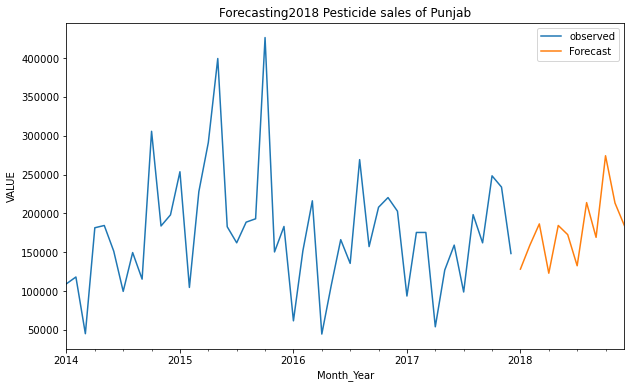

In [162]:
pred_uc2_2018 = mod2.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y2['2014':].plot(label='observed')
pred_uc2_2018.predicted_mean.plot(ax=ax, label='Forecast')

plt.title("Forecasting2018 Pesticide sales of Punjab")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting2018 Pesticide sales.pdf")
plt.show()


In [163]:
# check forecast2018 data 
Y_predictions2=pred_uc2_2018.predicted_mean
Y_predictions2

2018-01-01    128371.625556
2018-02-01    159200.311336
2018-03-01    186581.503262
2018-04-01    123113.509003
2018-05-01    184583.995379
2018-06-01    172774.548351
2018-07-01    132707.175694
2018-08-01    214018.030027
2018-09-01    169278.831162
2018-10-01    274336.333643
2018-11-01    213471.934208
2018-12-01    184219.951276
Freq: MS, Name: predicted_mean, dtype: float64

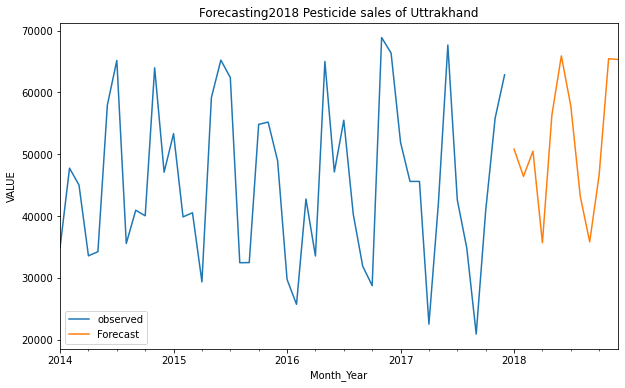

In [164]:
pred_uc3_2018 = mod3.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y3['2014':].plot(label='observed')
pred_uc3_2018.predicted_mean.plot(ax=ax, label='Forecast')

plt.title("Forecasting2018 Pesticide sales of Uttrakhand")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting2018 Pesticide sales.pdf")
plt.show()


In [165]:
# check forecast2018 data 
Y_predictions3=pred_uc3_2018.predicted_mean
Y_predictions3

2018-01-01    50837.027705
2018-02-01    46430.506802
2018-03-01    50507.004022
2018-04-01    35698.357273
2018-05-01    56331.052801
2018-06-01    65910.067544
2018-07-01    57838.979516
2018-08-01    43208.555656
2018-09-01    35839.654917
2018-10-01    46698.731704
2018-11-01    65455.606755
2018-12-01    65330.430134
Freq: MS, Name: predicted_mean, dtype: float64

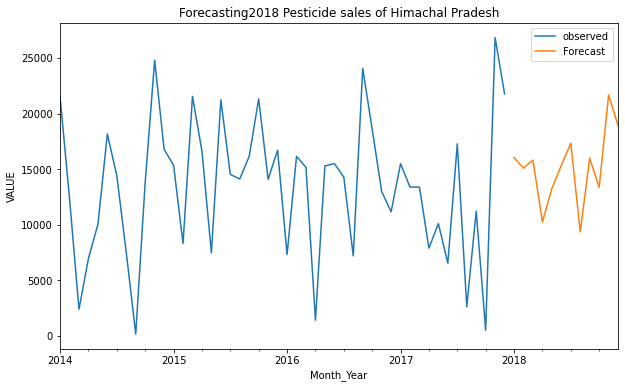

In [166]:
pred_uc4_2018 = mod4.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y4['2014':].plot(label='observed')
pred_uc4_2018.predicted_mean.plot(ax=ax, label='Forecast')

plt.title("Forecasting2018 Pesticide sales of Himachal Pradesh")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting2018 Pesticide sales.pdf")
plt.show()


In [167]:
# check forecast2018 data 
Y_predictions4=pred_uc4_2018.predicted_mean
Y_predictions4

2018-01-01    16031.338912
2018-02-01    15086.958341
2018-03-01    15822.017180
2018-04-01    10251.347040
2018-05-01    13250.977239
2018-06-01    15336.374324
2018-07-01    17333.670642
2018-08-01     9376.615673
2018-09-01    15995.372550
2018-10-01    13358.745864
2018-11-01    21670.968455
2018-12-01    18920.655565
Freq: MS, Name: predicted_mean, dtype: float64

# Time Series Forecasting with Prophet

In [168]:
from prophet import Prophet

In [169]:
UP1=data[pesticide1['STATE']==('Uttar Pradesh')]

HR1=data[pesticide1['STATE'] == 'Haryana']

HP1=data[pesticide1['STATE']==('Himachal Pradesh')]

PJ1=data[pesticide1['STATE']==('Punjab')]

UK1=data[pesticide1['STATE']==('Uttarakhand')]

In [170]:
UP1.drop('STATE',axis=1,inplace= True)
HR1.drop('STATE',axis=1,inplace= True)
HP1.drop('STATE',axis=1,inplace= True)
PJ1.drop('STATE',axis=1,inplace= True)
UK1.drop('STATE',axis=1,inplace= True)


In [171]:
# giving y name to VALUES and ds to MONTH_DATE column

HR1.columns= ['y','ds']
UP1.columns= ['y','ds']
PJ1.columns= ['y','ds']
UK1.columns= ['y','ds']
HP1.columns= ['y','ds']

In [172]:
HR1

,y,ds
176311,0.000,2014-01-01
176312,0.000,2014-01-01
176313,0.000,2014-01-01
115139,17.280,2014-01-01
115140,19.980,2014-01-01
...,...,...
165747,0.000,2017-12-01
165746,6.075,2017-12-01
165745,1.890,2017-12-01
165744,24.165,2017-12-01


In [173]:
UP1.head()

,y,ds
65737,745.065,2014-01-01
7992,5474.385,2014-01-01
7991,8374.590,2014-01-01
7990,11043.675,2014-01-01
7989,7918.965,2014-01-01


In [174]:
# GROUPING

UP1= UP1.groupby('ds')['y'].sum().reset_index()

UP1= UP1.set_index('ds')

UP1.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='ds', freq=None)

In [175]:
ABC_model = Prophet(interval_width=0.95)
ABC_model.fit(HR1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [176]:
ABC_future = ABC_model.make_future_dataframe(periods=12,freq= 'MS')

In [177]:
ABC_forecast = ABC_model.predict(ABC_future)

<Figure size 1296x432 with 0 Axes>

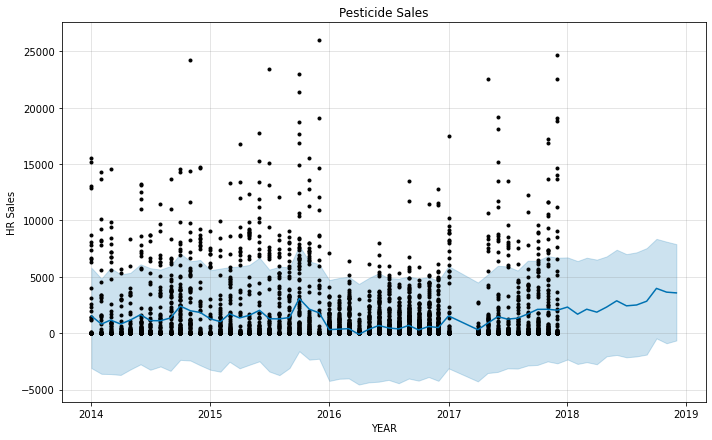

In [178]:
plt.figure(figsize=(18, 6))
ABC_model.plot(ABC_forecast, xlabel = 'YEAR', ylabel = 'HR Sales')
plt.title('Pesticide Sales')
plt.show;

In [179]:
ABC_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,983.261563,-3084.593926,5813.674473,983.261563,983.261563,552.655530,552.655530,552.655530,552.655530,552.655530,552.655530,0.0,0.0,0.0,1535.917093
1,2014-02-01,1007.385908,-3597.446778,4844.582517,1007.385908,1007.385908,-194.478002,-194.478002,-194.478002,-194.478002,-194.478002,-194.478002,0.0,0.0,0.0,812.907906
2,2014-03-01,1029.175640,-3617.885455,5795.493181,1029.175640,1029.175640,140.858467,140.858467,140.858467,140.858467,140.858467,140.858467,0.0,0.0,0.0,1170.034107
3,2014-04-01,1053.299977,-3695.964856,5216.860238,1053.299977,1053.299977,-235.783916,-235.783916,-235.783916,-235.783916,-235.783916,-235.783916,0.0,0.0,0.0,817.516061
4,2014-05-01,1076.646110,-3207.105127,5356.800636,1076.646110,1076.646110,102.102643,102.102643,102.102643,102.102643,102.102643,102.102643,0.0,0.0,0.0,1178.748753


In [180]:
ABC_forecast[['ds','yhat']]

,ds,yhat
0,2014-01-01,1535.917093
1,2014-02-01,812.907906
2,2014-03-01,1170.034107
3,2014-04-01,817.516061
4,2014-05-01,1178.748753
5,2014-06-01,1649.712714
6,2014-07-01,1120.611250
7,2014-08-01,1110.252259
8,2014-09-01,1358.769353
9,2014-10-01,2412.358141


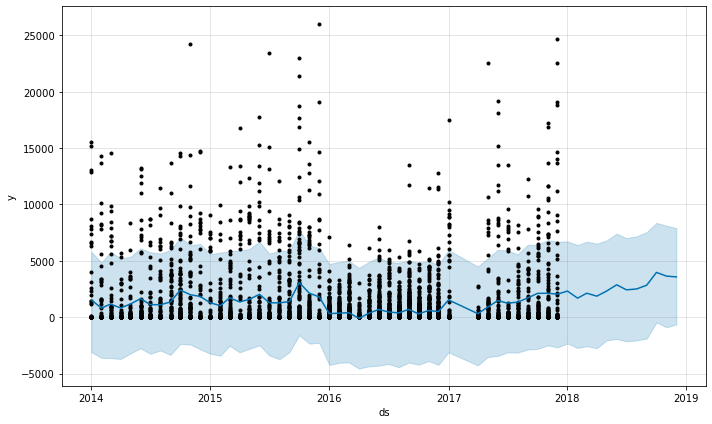

In [181]:
plot1= ABC_model.plot(ABC_forecast)

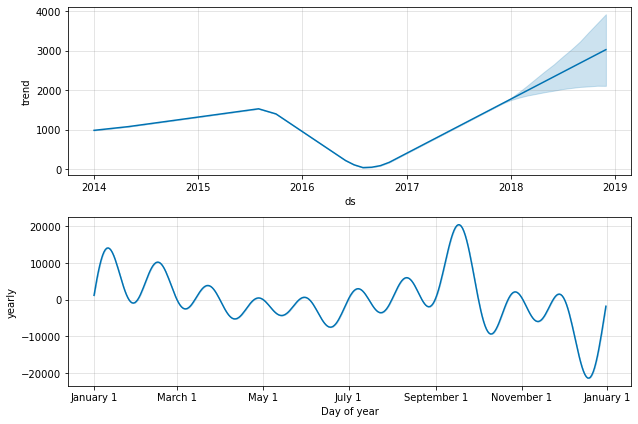

In [182]:
plot2= ABC_model.plot_components(ABC_forecast)

In [183]:
# Checking the RMSE of Prophet model
metric_prophet_1 = ABC_forecast.set_index('ds')[['yhat']].join(HR1.set_index('ds').y).reset_index()
metric_prophet_1.dropna(inplace=True)

In [184]:
rms_prophet_1 = mean_squared_error(metric_prophet_1.y, metric_prophet_1.yhat)

In [185]:
rms_prophet_1

5327853.32192776

In [186]:
mape_prop = np.round(np.mean(np.abs(metric_prophet_1.yhat-metric_prophet_1.y)/metric_prophet_1.yhat)*100,2)
print(mape_prop)


125.9



Conclusion
As per the observation, the RMSE for ARIMA is less than prophet modeling. So, we can go ahead with SARIMA mod